# Содержание

[Описание проекта](#Описание_проекта)

[Импорт библиотек](#Импорт_библиотек)

[Шаг 1. Загрузка данных и ознакомление](#Шаг_1)

[Шаг 2. Обработка данных](#Шаг_2)

[Шаг 2.1 Сортировка данных](#Шаг_2.1)

[Шаг 2.2 Извлечение полного текста](#Шаг_2.2)

[Шаг 2.3 Разделение текста по хеш-фрагменту](#Шаг_2.3)

[Шаг 3. Определение полноты извлекаемого текста](#Шаг_3)

[Шаг 3.1 Подготовка текста и лемматизация](#Шаг_3.1)

[Шаг 3.2 Расчет полноты извлекаемого текста](#Шаг_3.2)

[Шаг 3.3 График "Полнота текста"](#Шаг_3.3)

[Шаг 4. Оценка остатков текста](#Шаг_4)

[Шаг 4.1 Добавление признака с остаточным текстом](#Шаг_4.1)

[Шаг 4.2 Вычисление показателя TF](#Шаг_4.2)

[Шаг 4.3 График "Показатель TF"](#Шаг_4.3)

[Шаг 5. Дополнительный анализ работы библиотеки](#Шаг_5)

[Шаг 6. Итоговый вывод и рекомендации](#Шаг_6)

# Описание проекта

**Описание исследования:**

Компания по разработке антивирусных программ для компьютеров разрабатывает новую библиотеку для парсинга текстов со страниц сайтов. Вам предоставлена промежуточная версия библиотеки для оценки качества ее работы.

**Задачи исследования:**

- определить полноту извлекаемого текста;
- оценить значимость частей текста, которые не удалось извлечь;
- проанализировать и предложить изменения в алгоритм работы библиотеки.

**Описание данных:**

- **URL** - ссылка на страницу сайта;
- **lib_text** - извлеченный текст со страницы сайта.

<a id='Импорт_библиотек'></a>

# Импорт библиотек

In [5]:
import pandas as pd            # для работы с Excel и DataFrame
import re                      # для регулярных выражений
import matplotlib.pyplot as plt  # для визуализации
import seaborn as sns          # для построения гистограмм
import inspect                 # для совместимости с некоторыми библиотеками
from collections import Counter  # для расчёта TF
from pymorphy2 import MorphAnalyzer  # для лемматизации русского языка

In [6]:
# Настройка отображения графиков
%matplotlib inline
sns.set(font_scale=1.3, style="whitegrid", rc={'figure.figsize': (20, 7)})
pd.set_option('display.max_colwidth', None)

# Установка опции отображения широких датафреймов
pd.set_option('display.max_colwidth', None)

<a id='Шаг_1'></a>

# Шаг 1. Загрузка данных и ознакомление

In [9]:
test_check = pd.read_excel('/Users/magomedgakaev/Downloads/Test_check.xlsx')

# вывод
with pd.option_context('display.max_colwidth', 50):
    display(test_check)

,URL,lib_text
0,https://expert.ru/ekonomika/vygodna-li-rossii-...,Серьезнее других от введения западных санкций ...
1,https://ria.ru/20250311/klyuchevaya_stavka-196...,"МОСКВА, 14 фев — РИА Новости Ключевая процентн..."
2,https://expert.ru/mnenie/denis-manturov-gosuda...,Со следующего года начнется реализация 12 мега...
3,https://ria.ru/20250304/kredity-2003042476.html,Самозапрет на кредиты - это новая возможность ...
4,https://lenta.ru/brief/2025/03/11/green/,"Заходя в магазин, вы часто замечали зеленые уп..."
5,https://lenta.ru/articles/2025/03/09/aslan/,"20 лет назад, 8 марта 2005 года, в чеченском с..."
6,https://expert.ru/finance/investorov-svyazyvay...,"Говоря сухим языком определений, цифровые фина..."
7,https://ria.ru/20250123/svo-1985822676.html,Поддержка военнослужащих и их семей с самого н...
8,https://expert.ru/mnenie/vse-teper-zavisit-tol...,— За последние два с половиной года из-за введ...
9,https://ria.ru/docs/about/privacy_policy.html,Федеральное государственное унитарное предприя...


**Выводы по шагу 1:**

1) в базе собраны статьи из следующих источников:
   - интернет-журнал "Эксперт";
   - интернет-издание "Лента.ru";
   - новостной сайт "Вести";
   - информационное агентство «РИА Новости».

Для удобства можно отсортировать объекты по типу интернет-ресурса, потому что каждый интернет-ресурс имеет свой шаблон страницы и ожидаемо, что пропуски фрагментов текста могут одинаково повторяться у одних и тех же изданий.

2) в базе нет полного текста со страниц сайтов для сравнения с извлеченным текстом, поэтому нужно раздобыть его самостоятельно.

3) ссылки **https://ria.ru/docs/about/privacy_policy.html** и **https://ria.ru/docs/about/privacy_policy.html#1748006692-13** отсылаются на одну и ту же страницу и отличаются только хеш-фрагментом (#1748006692-13), который указывает на определенный абзац на этой страницы. Проблема в том, что в датасете каждая ссылка ссылается на весь текст страницы, когда как текст нужно разбить на две части. Необходимо определить местоположение хеш-фрагмента и разделить статью на две части. Границей разделения будет фраза в тексте, к которой привязан хеш-фрагмент.

<a id='Шаг_2'></a>

# Шаг 2. Обработка данных

<a id='Шаг_2.1'></a>

### Шаг 2.1 Сортировка

In [15]:
test_check_sorted = test_check.sort_values(
    by='URL',
    key=lambda col: col.map(lambda url: (
        0 if url.startswith("https://expert.ru") else
        1 if url.startswith("https://lenta.ru") else
        2 if url.startswith("https://www.vesti.ru") else
        3 if url.startswith("https://ria.ru") else
        4
    ))
).reset_index(drop=True)

# вывод
with pd.option_context('display.max_colwidth', 50):
    display(test_check_sorted.head())

,URL,lib_text
0,https://expert.ru/ekonomika/vygodna-li-rossii-...,Серьезнее других от введения западных санкций ...
1,https://expert.ru/novosti-partnerov/transforma...,Цель проекта — «разработать универсальную диза...
2,https://expert.ru/v-mire/amerika-ispytyvaet-kr...,Победа на выборах Дональда Трампа и разговоры ...
3,https://expert.ru/news/minstroy-rekomendoval-n...,"В Минстрое уточнили, что документ носит рекоме..."
4,https://expert.ru/multimedia/photos/v-moskve-p...,На NAIS был впервые показан широкой публике от...


<a id='Шаг_2.2'></a>

### Шаг 2.2 Извлечение полного текста

Так как парсинг не гарантирует 100% извлечения текста, я решил вручную скопировать текст со страниц сайтов.
Собранную информацию я занес в отдельную эксель-таблицу. Код загрузки таблицы ниже.

In [19]:
# загружаем таблицу с полными текстами

data_full = pd.read_excel('/Users/magomedgakaev/Downloads/full.xlsx')

# вывод
with pd.option_context('display.max_colwidth', 50):
    display(data_full.head())

,URL,full_text
0,https://expert.ru/ekonomika/vygodna-li-rossii-...,Выгодна ли России отмена санкций США\nОслаблен...
1,https://expert.ru/novosti-partnerov/transforma...,Трансформация образа: в чем ценность дизайн-си...
2,https://expert.ru/v-mire/amerika-ispytyvaet-kr...,Америка испытывает крипторынок на прочность\nН...
3,https://expert.ru/news/minstroy-rekomendoval-n...,Минстрой рекомендовал не строить микроквартиры...
4,https://expert.ru/multimedia/photos/v-moskve-p...,В Москве прошла выставка инфраструктуры гражда...


In [20]:
# объединение датасетов

text_data = data_full.merge(test_check_sorted, on="URL", how="left")

# вывод
with pd.option_context('display.max_colwidth', 50):
    display(text_data.head())

,URL,full_text,lib_text
0,https://expert.ru/ekonomika/vygodna-li-rossii-...,Выгодна ли России отмена санкций США\nОслаблен...,Серьезнее других от введения западных санкций ...
1,https://expert.ru/novosti-partnerov/transforma...,Трансформация образа: в чем ценность дизайн-си...,Цель проекта — «разработать универсальную диза...
2,https://expert.ru/v-mire/amerika-ispytyvaet-kr...,Америка испытывает крипторынок на прочность\nН...,Победа на выборах Дональда Трампа и разговоры ...
3,https://expert.ru/news/minstroy-rekomendoval-n...,Минстрой рекомендовал не строить микроквартиры...,"В Минстрое уточнили, что документ носит рекоме..."
4,https://expert.ru/multimedia/photos/v-moskve-p...,В Москве прошла выставка инфраструктуры гражда...,На NAIS был впервые показан широкой публике от...


<a id='Шаг_2.3'></a>

### Шаг 2.3 Разделение текста по хеш-фрагменту

In [23]:
# Фраза, по которой нужно разделить текст
split_phrase = "До решения Вашего вопроса, направленного к нам в обращении."

# Получаем одинаковый текст из строк 46 и 47
line_text = text_data.loc[46, "lib_text"]

# Разделяем текст по нужной фразе
before_split, after_split = line_text.split(split_phrase, 1)

# Формируем две части
part_46 = (before_split + split_phrase).strip()
part_47 = after_split.strip()

# Обновляем значения в датафрейме
text_data.at[46, "lib_text"] = part_46
text_data.at[47, "lib_text"] = part_47

# выводим объекты 46 и 47
with pd.option_context('display.max_colwidth', 50):
    display(text_data.iloc[[46, 47]])

,URL,full_text,lib_text
46,https://ria.ru/docs/about/privacy_policy.html,Политика конфиденциальности\nФедеральное госуд...,Федеральное государственное унитарное предприя...
47,https://ria.ru/docs/about/privacy_policy.html#...,5.2. Обработка персональных данных без идентиф...,Наш сайт осуществляет автоматический сбор свед...


**Выводы по шагу 2:**

- объекты отсортированы по типу интернет-ресурса;
- добавлен признак full_text с полным текстом;
- исправлен текст в объектах под индексами 46 и 47.

<a id='Шаг_3'></a>

# Шаг 3. Определение полноты извлекаемого текста

<a id='Шаг_3.1'></a>

### Шаг 3.1 Подготовка текста и лемматизация

In [29]:
# далее будем работать с копией

text = text_data.copy()

Так как я использую Python 3.11, то с этой версией уже несовместимы некоторые функции библиотеки pymorphy2. Например, функция inspect.getargspec(), которая служит для получения информации о параметрах функции считается устаревшей. Поэтому, чтобы библиотека pymorphy2 смогла работать, создаем ее вручную:

In [31]:
if not hasattr(inspect, 'getargspec'):
    def getargspec(func):
        spec = inspect.getfullargspec(func)
        return spec.args, spec.varargs, spec.varkw, spec.defaults
    inspect.getargspec = getargspec

In [32]:
# создаем объект для морфологического анализа

morph = MorphAnalyzer()

In [33]:
def preprocess_text(text): # объявляем функцию preprocess_text
    text = re.sub(r"[^\w\s]", " ", text, flags=re.UNICODE) # удаление лишних символов
    text = text.lower() # привидение к нижнему регистру
    tokens = text.split() # токенизация

    lemmas = [] # пустой список для сбора созданных лемм
    
    for token in tokens: # цикл по каждому токену
        parsed = morph.parse(token)[0] # список вариантов разбора слов
        pos = parsed.tag.POS  # получаем часть речи
        if pos not in ('CONJ', 'PRCL', 'PREP'):  # убираем союзы, частицы, предлоги
            lemmas.append(parsed.normal_form)  # лемматизация

    return ' '.join(lemmas) # возвращаем в список lemmas леммы слов

In [34]:
# лемматизируем признаки full_text и lib_text

text["full_text"] = text["full_text"].apply(preprocess_text)
text["lib_text"] = text["lib_text"].apply(preprocess_text)

# вывод
with pd.option_context('display.max_colwidth', 50):
    display(text.head())

,URL,full_text,lib_text
0,https://expert.ru/ekonomika/vygodna-li-rossii-...,выгодный россия отмена санкция сша ослабление ...,серьёзный другой введение западный санкция пос...
1,https://expert.ru/novosti-partnerov/transforma...,трансформация образ ценность дизайн система пр...,цель проект разработать универсальный дизайн с...
2,https://expert.ru/v-mire/amerika-ispytyvaet-kr...,америка испытывать крипторынок прочность надеж...,победа выборы дональд трамп разговор тот новый...
3,https://expert.ru/news/minstroy-rekomendoval-n...,минстрой рекомендовать строить микроквартира р...,минстрой уточнить документ носить рекомендател...
4,https://expert.ru/multimedia/photos/v-moskve-p...,москва пройти выставка инфраструктура гражданс...,nais быть впервые показать широкий публика оте...


<a id='Шаг_3.2'></a>

### Шаг 3.2 Расчет полноты извлекаемого текста

Чтобы определить полноту извлекаемого текста, мы рассчитаем процент извлеченного текста от общего числа полного текста.

In [38]:
def compute_recall(lib, full): # объявляем функцию с двумя параметрами
    lib_tokens = set(lib.split()) # создаем множество уникальных значений признака lib_text
    full_tokens = set(full.split()) # создаем множество уникальных значений признака full_text
    return round(len(lib_tokens) / (len(full_tokens) / 100)) # рассчитываем процент lib_text от full_text

# Применим к датафрейму
text["percent_lib_text"] = text.apply(
    lambda row: compute_recall(row["lib_text"], row["full_text"]), axis=1
)

# вывод
with pd.option_context('display.max_colwidth', 50):
    display(text.head())

,URL,full_text,lib_text,percent_lib_text
0,https://expert.ru/ekonomika/vygodna-li-rossii-...,выгодный россия отмена санкция сша ослабление ...,серьёзный другой введение западный санкция пос...,95
1,https://expert.ru/novosti-partnerov/transforma...,трансформация образ ценность дизайн система пр...,цель проект разработать универсальный дизайн с...,96
2,https://expert.ru/v-mire/amerika-ispytyvaet-kr...,америка испытывать крипторынок прочность надеж...,победа выборы дональд трамп разговор тот новый...,95
3,https://expert.ru/news/minstroy-rekomendoval-n...,минстрой рекомендовать строить микроквартира р...,минстрой уточнить документ носить рекомендател...,92
4,https://expert.ru/multimedia/photos/v-moskve-p...,москва пройти выставка инфраструктура гражданс...,nais быть впервые показать широкий публика оте...,89


<a id='Шаг_3.3'></a>

### Шаг 3.3 График "Полнота текста"

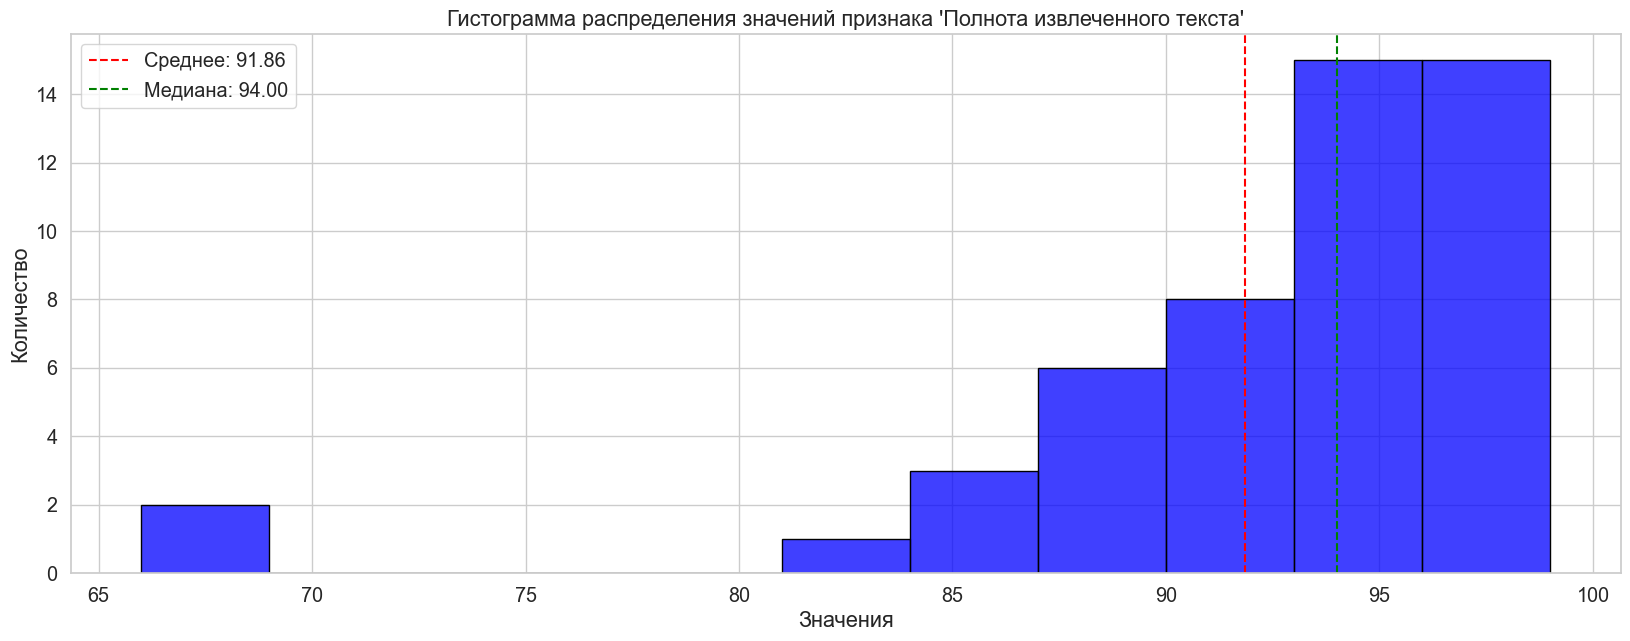

In [41]:
sns.histplot(text['percent_lib_text'], color='blue', edgecolor='black')
plt.title("Гистограмма распределения значений признака 'Полнота извлеченного текста'")
plt.axvline(text['percent_lib_text'].mean(), color='red', linestyle='--', label=f"Среднее: {text['percent_lib_text'].mean():.2f}")
plt.axvline(text['percent_lib_text'].median(), color='green', linestyle='--', label=f"Медиана: {text['percent_lib_text'].median():.2f}")
plt.xlabel("Значения")
plt.ylabel("Количество")
plt.legend()
plt.show();

**Выводы по шагу 3:**

График показывает высокий уровень полноты извлекаемого текста. Близкие значения арифметического среднего и медианы говорят о довольно близких показателях полноты извлекаемого текста с различных сайтов. Статистический выброс в интервале (65; 70) - это две страницы новостного сайта "Вести". Стоит взять их на заметку.

<a id='Шаг_4'></a>

# Шаг 4. Оценка остатков текста

### Шаг 4.1 Добавление признака с остаточным текстом

In [46]:
# добавляем новый признак "remains_text", который содержит остатки текста

def get_remains_text(row): 
    full_words = row['full_text'].split() 
    lib_words = set(row['lib_text'].split())
    remains = [word for word in full_words if word not in lib_words]
    return ' '.join(remains)
    
text['remains_text'] = text.apply(get_remains_text, axis=1)

# вывод
with pd.option_context('display.max_colwidth', 50):
    display(text.head())

,URL,full_text,lib_text,percent_lib_text,remains_text
0,https://expert.ru/ekonomika/vygodna-li-rossii-...,выгодный россия отмена санкция сша ослабление ...,серьёзный другой введение западный санкция пос...,95,выгодный перечеркнуть яков тимаковый анастасия...
1,https://expert.ru/novosti-partnerov/transforma...,трансформация образ ценность дизайн система пр...,цель проект разработать универсальный дизайн с...,96,трансформация ао научно технологический большо...
2,https://expert.ru/v-mire/amerika-ispytyvaet-kr...,америка испытывать крипторынок прочность надеж...,победа выборы дональд трамп разговор тот новый...,95,америка испытывать прочность оправдаться борис...
3,https://expert.ru/news/minstroy-rekomendoval-n...,минстрой рекомендовать строить микроквартира р...,минстрой уточнить документ носить рекомендател...,92,власть субъект россия согласовывать проект сту...
4,https://expert.ru/multimedia/photos/v-moskve-p...,москва пройти выставка инфраструктура гражданс...,nais быть впервые показать широкий публика оте...,89,москва пройти выставка инфраструктура 2025 это...


<a id='Шаг_4.2'></a>

### Шаг 4.2 Вычисление показателя TF

Оценим значимость нераспознанного текста при помощи показателя TF. TF определит значимость слов в полном тексте (чем распространеннее слово, тем выше его вес). Далее, TF смотрит какие слова встречаются в нераспознанном тексте. Чем больше популярных слов из полного текста в остаточном тексте, тем сильнее он связан по смыслу с полным текстом и тем выше его значимость. Исходя из этого, присваивается оценка значимости каждому фрагменту остаточного текста в датасете (чем ниже показатель TF тем выше значимость текста).

In [50]:
def calculate_tf(remains_text, full_text):
    remains_words = remains_text.split()  # токены из остатка
    full_words = full_text.split()        # токены из полного текста

    count_full = Counter(full_words)
    full_len = len(full_words)

    tf_sum = sum(count_full.get(word, 0) / full_len for word in remains_words)
    return tf_sum

text['remains_tf'] = text.apply(lambda row: calculate_tf(row['remains_text'], row['full_text']), axis=1)
text['remains_tf'] = (text['remains_tf'] * 100).round(0).astype(int)

# Вывод
with pd.option_context('display.max_colwidth', 50):
    display(text.head())

,URL,full_text,lib_text,percent_lib_text,remains_text,remains_tf
0,https://expert.ru/ekonomika/vygodna-li-rossii-...,выгодный россия отмена санкция сша ослабление ...,серьёзный другой введение западный санкция пос...,95,выгодный перечеркнуть яков тимаковый анастасия...,2
1,https://expert.ru/novosti-partnerov/transforma...,трансформация образ ценность дизайн система пр...,цель проект разработать универсальный дизайн с...,96,трансформация ао научно технологический большо...,3
2,https://expert.ru/v-mire/amerika-ispytyvaet-kr...,америка испытывать крипторынок прочность надеж...,победа выборы дональд трамп разговор тот новый...,95,америка испытывать прочность оправдаться борис...,3
3,https://expert.ru/news/minstroy-rekomendoval-n...,минстрой рекомендовать строить микроквартира р...,минстрой уточнить документ носить рекомендател...,92,власть субъект россия согласовывать проект сту...,5
4,https://expert.ru/multimedia/photos/v-moskve-p...,москва пройти выставка инфраструктура гражданс...,nais быть впервые показать широкий публика оте...,89,москва пройти выставка инфраструктура 2025 это...,64


<a id='Шаг_4.3'></a>

### Шаг 4.3 График "Показатель TF"

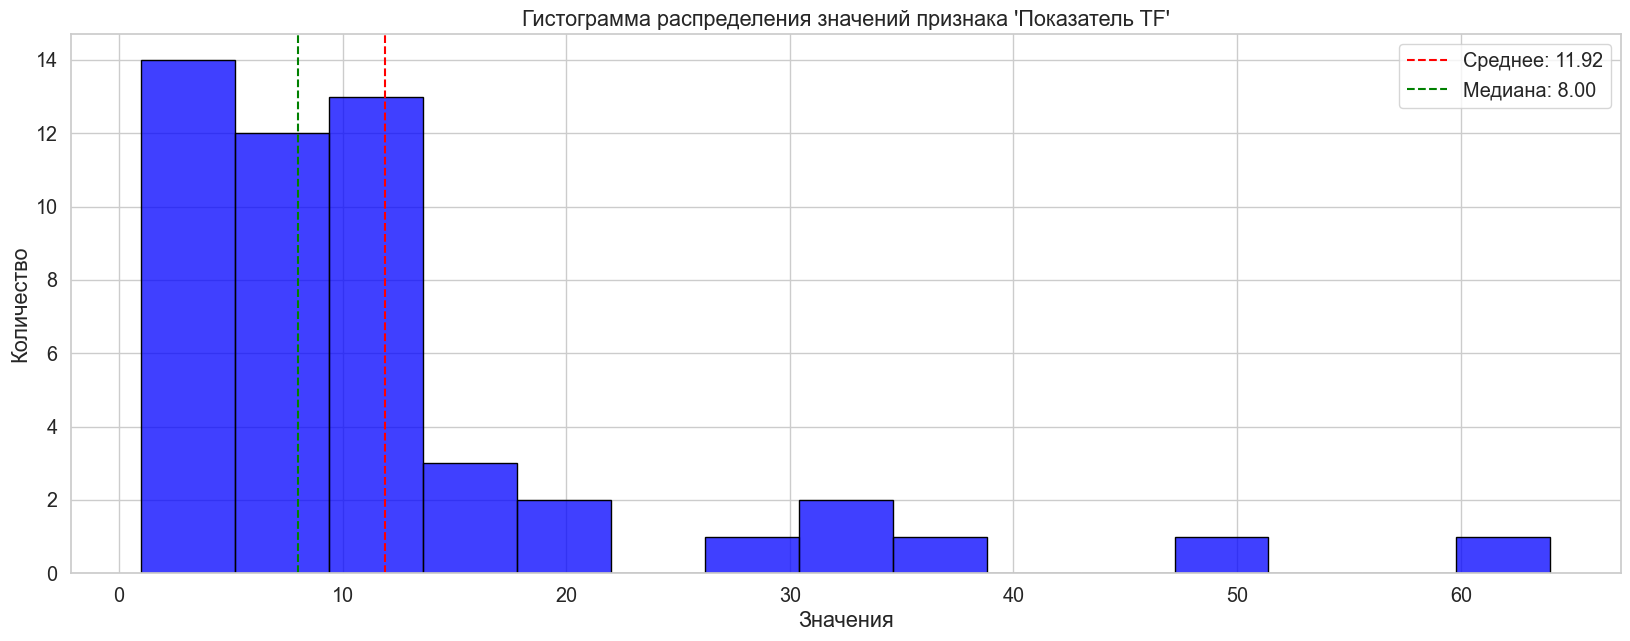

In [53]:
sns.histplot(text['remains_tf'], color='blue', edgecolor='black')
plt.title("Гистограмма распределения значений признака 'Показатель TF'")
plt.axvline(text['remains_tf'].mean(), color='red', linestyle='--', label=f"Среднее: {text['remains_tf'].mean():.2f}")
plt.axvline(text['remains_tf'].median(), color='green', linestyle='--', label=f"Медиана: {text['remains_tf'].median():.2f}")
plt.xlabel("Значения")
plt.ylabel("Количество")
plt.legend()
plt.show();

**Выводы по шагу 4:**

Согласно графику, показатели TF не такие однородные как в случае с графиком полноты извлеченного текста: арифметическое среднее в 1,5 раза больше медианы. При этом, значение арифметического среднего равно 12, что для новостных текстов можно отнести к категории "удовлетворительно". Новостным текстам свойственна лаконичность и сжатость излагаемого материала, поэтому такой показатель нельзя определить как хороший и тем более как отличный.

<a id='Шаг_5'></a>

# Шаг 5. Дополнительный анализ работы библиотеки

Чтобы глубже понять работу библиотеки, я решил узнать какие html-теги распознаются библиотекой лучше, а какие хуже. Для этого я выбрал несколько сайтов с различными показателями полноты и TF, и вручную выявил распознаваемые и нераспознаваемые теги для библиотеки. Ниже я сделал свод выполненной работы. В комментарии к тегу указывается какую роль текст выполняет на странице сайта.

```python
Распознанные теги:

1) <strong>текст</strong> # основной текст жирным шрифтом
2) <p>текст</p> # основной текст нежирным шрифтом
3) <i>текст</i> # основной мелкий шрифт курсивом
4) <h2 class="topic-body__content-title">текст</h2> # подзаголовок
5) <h3 class="title-red-exp1">текст</h3> # основная мысль абзаца
6) <p class="topic-body__content-text _lead">текст</p> # основной мелкий шрифт
7) <p class="box-note__text">текст</p> # акцентированное предложение жирным шрифтом
8) <div class="article__text"><strong>текст</div> # основной текст нежирным шрифтом


Нераспознанные теги:

1) <h1 itemprop="headline">текст</h1> # основной заголовок
2) <h1 class="article__title">текст</h1> # основной заголовок
3) <h2 id="1733022511-1">текст</h2> # подзаголовок
4) <p class="description__credits">текст</p> # подпись к фото
5) <p class="box-quote__content-text">текст<br></p> # цитата
6) <span class="article-theme" itemprop="name">текст</span> # категория статьи (экономика, политика и т.д.)
7) <span class="img-block-text" style="color: #959595;">текст</span> # подпись к фото
8) <span class="topic-body__title">текст</span> # основной заголовок
9) <span class="topic-body__rightcol">текст</span> # вопрос после основного заголовка
10) <span class="topic-authors__name">текст</span> # фамилия и имя автора статьи
11) <span class="box-quote__author-name">текст</span> # автор цитаты
12) <span class="box-quote__author-description">текст</span> # должность автора цитаты
13) <div class="previews-text">текст</div> # превью статьи
14) <div class="article__anons">текст</div> # превью статьи
15) <div class="topic-body__title-yandex">текст</div> # дополнительный текст к основному заголовку
16) <div class="media__description " data-nosnippet="true">текст</div> # подпись к фото
17) <a href="#1733022511-1968732634">текст</a> # содержание статьи
```

**Выводы по шагу 5:**

Согласно проведенной работе можно сделать вывод, что библиотека хорошо распознает теги для основного текста и плохо справляется с тегами для заголовков, подзаголовков, превью статьи, цитат и подписей к фото.

<a id='Шаг_6'></a>

# Шаг 6. Итоговый вывод и рекомендации

### Итоговый датасет

In [63]:
# Выбираем нужные столбцы из каждого датафрейма
data_final = pd.concat([
    text_data[['full_text', 'lib_text']],
    text[['percent_lib_text', 'remains_tf']]
], axis=1)

# вывод
with pd.option_context('display.max_colwidth', 50):
    display(data_final.head())

# Сохраняем датафрейм в Excel
#data_final.to_excel("data_final.xlsx", index=False)

,full_text,lib_text,percent_lib_text,remains_tf
0,Выгодна ли России отмена санкций США\nОслаблен...,Серьезнее других от введения западных санкций ...,95,2
1,Трансформация образа: в чем ценность дизайн-си...,Цель проекта — «разработать универсальную диза...,96,3
2,Америка испытывает крипторынок на прочность\nН...,Победа на выборах Дональда Трампа и разговоры ...,95,3
3,Минстрой рекомендовал не строить микроквартиры...,"В Минстрое уточнили, что документ носит рекоме...",92,5
4,В Москве прошла выставка инфраструктуры гражда...,На NAIS был впервые показан широкой публике от...,89,64


в котором:

- **full_text** - полный текст с сайта;
- **lib_text** - извлеченный текст с сайта;
- **percent_lib_text** - процент извлеченного текста от полного текста;
- **remains_tf** - показатель TF для оценки значимости остаточного текста.

### Выводы и рекомендации

В целом, библиотека показывает довольно высокий уровень парсинга (среднее значение равно 92). Чаще всего библиотека распознает текст, написанный базовыми тегами: `<strong>`, `<p>`, `<i>`, `<h2>`, `<h3>`, `<div>` .

Также библиотека хорошо справляется с тегами, у которых класс явно указывает на содержание или форматирование (например, `class="topic-body__content-title`, `class="title-red-exp1`).

Если текст изобилует другими тегами, то библиотека плохо извлекает текст. Например, тексты с наихудшими показателями полноты извлечения и значимости TF это те тексты, которые содержат различные превью и цитаты.

**РЕКОМЕНДАЦИЯ**: Необходимо доработать библиотеку, чтобы учитывался текст, выполненный на основе большего вида тегов. Ниже список неучтенных тегов, которые необходимо учитывать в дальнейшем (список может дополняться):
```python

1) <h1 itemprop="headline">текст</h1> # основной заголовок
2) <h1 class="article__title">текст</h1> # основной заголовок
3) <h2 id="1733022511-1">текст</h2> # подзаголовок
4) <p class="box-quote__content-text">текст<br></p> # цитата
5) <span class="article-theme" itemprop="name">текст</span> # категория статьи (экономика, политика и т.д.)
6) <span class="topic-body__title">текст</span> # основной заголовок
7) <span class="topic-body__rightcol">текст</span> # вопрос после основного заголовка
8) <div class="previews-text">текст</div> # превью статьи
9) <div class="article__anons">текст</div> # превью статьи
10) <div class="topic-body__title-yandex">текст</div> # дополнительный текст к основному заголовку
11) <a href="#1733022511-1968732634">текст</a> # содержание статьи
```